## Task 2:
You are playing a heated game of Dungeons & Dragons and the dungeon master's (DM) main character always attacks you with two weapons (one die each). 
You would like to know what type of weapons they are and could guess, if you knew the individual damage rolls, but the DM only gives you the sum of the rolled values. You know it has to be either a d6, d8, d10, or d12 (dX = X-sided die) for either weapon and the DM always rolls two at the same time and gives you the sum. Your hypothesis would be that it is a d6 and a d10. What is the evidence for this hypothesis if the last 5 throws gave you the summed numbers [10, 12, 15, 4, 7]

In [48]:
# likelihood --> 0 if more, 1/sum if less or equal
# incoming data = [10, 12, 15, 4, 7]
# possible combinations: 6+6, 6+8, 6+10, 6+12, 8+8, 8+10, 8+12, 10+10, 10+12, 12+12 --> 10 combinations


sums = [12, 14, 16, 18, 16, 18, 20, 20, 22, 24]


# define likelihood
def likelihood(datapoint, sum_value):
    if datapoint > sum_value:
        return 0
    return 1/sum_value
        

# get normalising constant for current datapoint
def nc(datapoint, prior):
    res = 0
    for i in range(len(sums)):
        res += prior[i] * likelihood(datapoint, sums[i])
    return res


# obtain posterior according to formula
def posterior(prior, datapoint):
    res = []
    for i in range(len(sums)):
        res.append((prior[i] * likelihood(datapoint, sums[i])) / nc(datapoint, prior))
    return res

In [49]:
data = [10, 12, 15, 4, 7]

prior = [1/10 for _ in range(10)] # uniform prior

for datapoint in data:
    p = posterior(prior, datapoint)
    prior = p

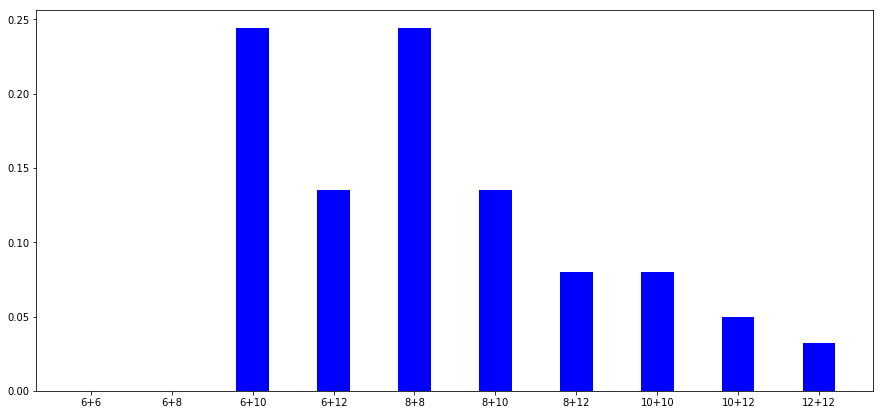

In [53]:
import matplotlib.pyplot as plt

x = ['6+6', '6+8', '6+10', '6+12', '8+8', '8+10', '8+12', '10+10', '10+12', '12+12']

plt.figure(figsize=(15,7))

ax = plt.subplot()
ax.bar(x, prior, width=0.4, color='b', align='center')

plt.show()

Since we know only the sum of two dices, and dices 6+10 and 8+8 produce the same sum, evidence for them is the same and equals 0.24388051020782645